<a href="https://colab.research.google.com/github/ambarishreddy/12-feb/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/Salary_dataset.csv")

In [3]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


# Basic Checks

In [4]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
data.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
data.info

<bound method DataFrame.info of     Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  101303.0
23          23              8.3  113813.0
24          24              8.8  109432.0
25          25              9.1  105583.0
26          26              9.6  116970.0
27          27              9.7  112636.0
28          28             10.4  122392.0
29          29             10.6  121873.0>

In [8]:
data.shape

(30, 3)

In [9]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [10]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [11]:
data.values

array([[0.00000e+00, 1.20000e+00, 3.93440e+04],
       [1.00000e+00, 1.40000e+00, 4.62060e+04],
       [2.00000e+00, 1.60000e+00, 3.77320e+04],
       [3.00000e+00, 2.10000e+00, 4.35260e+04],
       [4.00000e+00, 2.30000e+00, 3.98920e+04],
       [5.00000e+00, 3.00000e+00, 5.66430e+04],
       [6.00000e+00, 3.10000e+00, 6.01510e+04],
       [7.00000e+00, 3.30000e+00, 5.44460e+04],
       [8.00000e+00, 3.30000e+00, 6.44460e+04],
       [9.00000e+00, 3.80000e+00, 5.71900e+04],
       [1.00000e+01, 4.00000e+00, 6.32190e+04],
       [1.10000e+01, 4.10000e+00, 5.57950e+04],
       [1.20000e+01, 4.10000e+00, 5.69580e+04],
       [1.30000e+01, 4.20000e+00, 5.70820e+04],
       [1.40000e+01, 4.60000e+00, 6.11120e+04],
       [1.50000e+01, 5.00000e+00, 6.79390e+04],
       [1.60000e+01, 5.20000e+00, 6.60300e+04],
       [1.70000e+01, 5.40000e+00, 8.30890e+04],
       [1.80000e+01, 6.00000e+00, 8.13640e+04],
       [1.90000e+01, 6.10000e+00, 9.39410e+04],
       [2.00000e+01, 6.90000e+00, 9.1739

In [12]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

# It is a simple linear regression because it has only one independent variable

The equation for simple linear regression is:
y=β0+β1X

# where:

Y is the dependent variable,
X is the independent variable,
β0 is the intercept, and
β1 is the slope

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [14]:
X = data.drop(columns=['Unnamed: 0'], axis=1)
Y = data['Salary']
model = DecisionTreeClassifier()
model.fit(X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [15]:
predictions = model.predict(X_test)
predictions

array([ 66030., 122392., 109432.,  98274.,  63219.,  56958.])

In [16]:
accuracy_score(Y_test, predictions)


1.0

In [17]:
confusion_matrix(Y_test, predictions)


array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

[Text(0.0625, 0.9833333333333333, 'x[0] <= 1.3\ngini = 0.967\nsamples = 30\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1]'),
 Text(0.03125, 0.95, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.09375, 0.95, 'x[1] <= 38812.0\ngini = 0.966\nsamples = 29\nvalue = [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1]'),
 Text(0.0625, 0.9166666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.125, 0.9166666666666666, 'x[1] <= 41709.0\ngini = 0.964\nsamples = 28\nvalue = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1]'),
 Text(0.09375, 0.8833333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]')

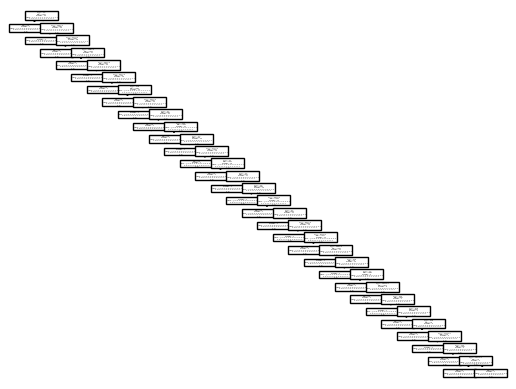

In [18]:
plot_tree(model)

In [19]:
evaluate_model = model.predict(X_test)
evaluate_model

array([ 66030., 122392., 109432.,  98274.,  63219.,  56958.])

In [20]:
evaluate_model.shape

(6,)

In [21]:
evaluate_model.size

6

In [22]:
accuracy_score(Y_test, evaluate_model)

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

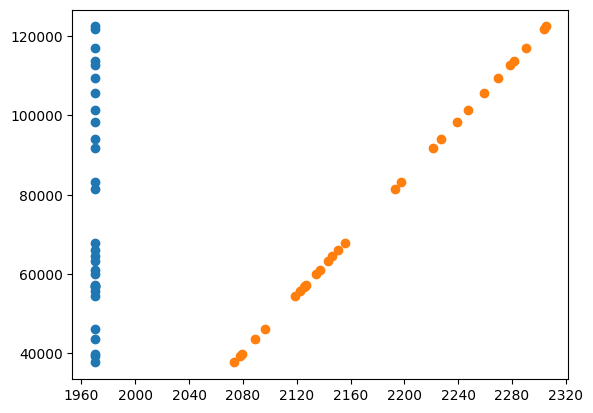

In [23]:
plt.plot_date(X,Y)
plt.show